In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, mean_squared_error


df = pd.read_csv(r"C:\Users\walte\Downloads\Traffic_Crashes_-_Crashes.csv")

In [21]:
df = df.drop(columns=['LANE_CNT','CRASH_RECORD_ID','CRASH_DATE_EST_I','CRASH_DATE','DATE_POLICE_NOTIFIED','STREET_NO','STREET_NAME','BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I', 
                      'STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I',
                      'WORK_ZONE_TYPE','WORKERS_PRESENT_I','NUM_UNITS','LATITUDE','LONGITUDE','LOCATION'])
df['HIT_AND_RUN_I'] = df['HIT_AND_RUN_I'].fillna('N').replace('', 'N')

df['HIT_AND_RUN_I'] = df['HIT_AND_RUN_I'].map({'Y': 1, 'N': 0})

In [23]:
def clean_data(df, target_col):
    df = df.dropna()  
    df = pd.get_dummies(df, drop_first=True)  
    y = df[target_col]  
    X = df.drop(columns=[target_col]) 
    return X, y

In [29]:
df_sampled = df.sample(frac=0.1, random_state=42)  
X, y = clean_data(df_sampled, target_col='HIT_AND_RUN_I')

In [31]:
def lasso_feature_selection(X, y, alpha=0.01):
    lasso = LassoCV(cv=5, random_state=42).fit(X, y)
    selected_features = X.columns[lasso.coef_ != 0]
    return selected_features

selected_features = lasso_feature_selection(X, y)
print(selected_features)

Index(['POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'CRASH_MONTH'], dtype='object')


              precision    recall  f1-score   support

         0.0       0.05      0.72      0.09      3620
         1.0       0.96      0.32      0.48     79445

    accuracy                           0.34     83065
   macro avg       0.50      0.52      0.28     83065
weighted avg       0.92      0.34      0.46     83065

Accuracy: 0.33649551556010354
Logistic Regression MSE: 0.24971693734470035


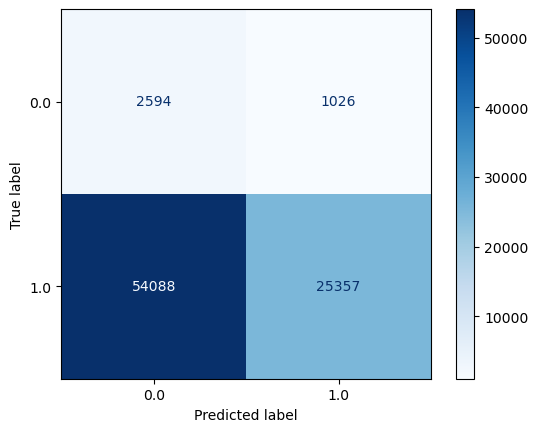

In [33]:
data = pd.read_csv(r"C:\Users\walte\Downloads\Traffic_Crashes_-_Crashes.csv")
data['HIT_AND_RUN_I'] = data['HIT_AND_RUN_I'].map({'Y': 1, 'N': 0})
features = ['POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'CRASH_MONTH']
data = data[features + ['HIT_AND_RUN_I']].dropna()
X, y = clean_data(data, target_col='HIT_AND_RUN_I')

X = data.drop('HIT_AND_RUN_I', axis=1)
y = data['HIT_AND_RUN_I']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap='Blues')

y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]  
mse_log_reg = mean_squared_error(y_test, y_prob_log_reg)
print("Logistic Regression MSE:", mse_log_reg)

In [35]:
# L1 Regularization
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
l1_scores = cross_val_score(log_reg_l1, X, y, cv=5, scoring='accuracy')
print("L1 Cross-Validation Accuracy:", l1_scores.mean())

# L2 Regularization 
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
l2_scores = cross_val_score(log_reg_l2, X, y, cv=5, scoring='accuracy')
print("L2 Cross-Validation Accuracy:", l2_scores.mean())

L1 Cross-Validation Accuracy: 0.9570898689827999
L2 Cross-Validation Accuracy: 0.9570898689827999


In [37]:
log_reg_l1.fit(X_train, y_train)
y_pred_l1 = log_reg_l1.predict(X_test)
test_accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print("L1 Regularization Test Accuracy:", test_accuracy_l1)

log_reg_l2.fit(X_train, y_train)
y_pred_l2 = log_reg_l2.predict(X_test)
test_accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print("L2 Regularization Test Accuracy:", test_accuracy_l2)

L1 Regularization Test Accuracy: 0.9564196713417203
L2 Regularization Test Accuracy: 0.9564196713417203


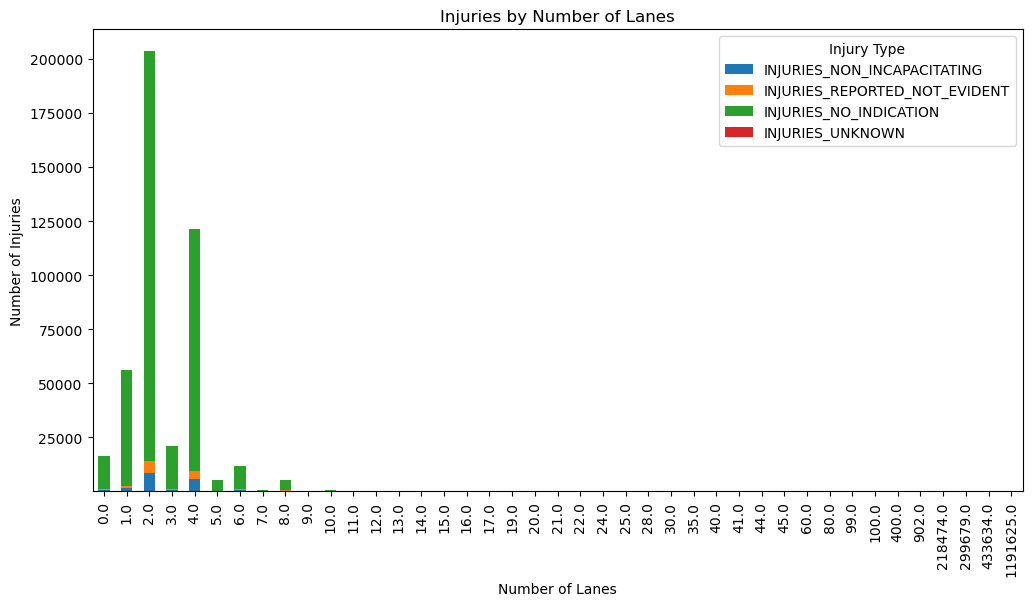

In [41]:
# Injury analysis by LANE_CNT
df = pd.read_csv(r"C:\Users\walte\Downloads\Traffic_Crashes_-_Crashes.csv")
injuries_by_lanes = df.groupby('LANE_CNT')[['INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']].sum()
injuries_by_lanes.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Injuries by Numof Lanes')
plt.xlabel('# Lanes')
plt.ylabel('# Injuries')
plt.legend(title='Injury Type')
plt.show()